Brayan Estiven Salcedo Suarez 202022731

En la era digital, la desinformación se ha convertido en un problema crítico, ya que la difusión de noticias falsas puede influir en la opinión pública, generar confusión y afectar la toma de decisiones. Para abordar este desafío, este trabajo propone la implementación de un sistema basado en aprendizaje automático para la detección automática de noticias falsas.  

El objetivo principal es desarrollar un modelo que, a partir del análisis de noticias previas, pueda predecir si una nueva noticia es confiable o no. Para ello, se aplicarán técnicas de **procesamiento de lenguaje natural (NLP)** y algoritmos de **aprendizaje supervisado** que permitirán identificar patrones lingüísticos, semánticos y estructurales en los textos.  

Este estudio no solo busca mejorar la precisión en la detección de noticias falsas, sino también proporcionar una herramienta útil para medios de comunicación, verificadores de información y usuarios en general, ayudando a combatir la desinformación en entornos digitales.

## **Descripción del Dataset**  

El dataset utilizado en este trabajo fue entregado por bloque neon y contiene una recopilación de noticias etiquetadas como verdaderas o falsas. Su estructura está diseñada para capturar información clave sobre cada noticia, permitiendo el análisis de su contenido y la identificación de patrones que diferencien noticias reales de noticias falsas.  

Las principales columnas del dataset son:  

- **ID**: Un identificador único para cada noticia en el dataset.  
- **Label**: Indica si la noticia es real (`1`) o falsa (`0`), lo que servirá como referencia para entrenar el modelo de detección.  
- **Título**: El encabezado de la noticia, que usualmente resume su contenido en pocas palabras.  
- **Descripción**: Un resumen breve de la noticia que proporciona más contexto sobre el título.  
- **Fecha**: La fecha en que la noticia fue publicada, lo que permite analizar tendencias a lo largo del tiempo.  

Ejemplo de registros en el dataset:  

| ID  | Label | Título | Descripción | Fecha |
|-----|-------|------------------------------------------------|------------------------------------------------------------------------------------------------|------------|
| 1   | 1     | 'The Guardian' va con Sánchez: 'Europa necesita que su apuesta dé sus frutos' | El diario británico publicó un editorial sobre las elecciones del 23J, calificando de valiente el adelanto electoral y alertando sobre los riesgos de la ultraderecha. | 02/06/2023 |
| 2   | 0     | REVELAN QUE EL GOBIERNO NEGOCIÓ LA LIBERACIÓN DE MIRELES A CAMBIO DE OTORGARLE EL PERDÓN A JAVIER DUARTE | Supuestas negociaciones entre el gobierno y Javier Duarte en el marco de la liberación de José Manuel Mireles. | N/A |






## instalación de librerias

In [54]:
!pip install nltk
!pip install contractions
!pip install inflect
!pip install scikit-plot
!pip install spacy
!pip install stanza
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, SnowballStemmer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.6.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Perfilamiento y entendimiento de datos

In [57]:
import pandas as pd

df = pd.read_csv("fake_news_spanish.csv", sep=";",encoding="utf-8" )
df_t=df

In [58]:
df_t

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018
...,...,...,...,...,...
57058,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,El gobierno regional han indicado que la atenc...,08/06/2021
57059,ID,0,El EQUO plantea ceder la presidencia de la Com...,Si la higiene democrática nos lleva a esa exig...,08/09/2020
57060,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,El coordinador federal de IU asegura que la mo...,12/07/2018
57061,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,Santiago Abascal: Vox tiene el derecho y el de...,13/02/2022


In [59]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57063 entries, 0 to 57062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           57063 non-null  object
 1   Label        57063 non-null  int64 
 2   Titulo       57047 non-null  object
 3   Descripcion  57063 non-null  object
 4   Fecha        57063 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


## Entendimiento de de los datos

Se realizó un perfilamiento inicial del dataset para comprender su estructura y calidad de datos, incluyendo la identificación de dimensiones, tipos de datos, valores nulos, filas duplicadas y la distribución de la variable objetivo. Se corrigió un error relacionado con datos de tipo lista al convertir todas las columnas a string, lo que permitió ejecutar correctamente la detección de duplicados. Este análisis es clave para garantizar que los datos estén en un formato adecuado antes de cualquier procesamiento o modelado.

In [60]:
df = df.astype(str)

# a. Dimensiones del dataset
print("Dimensiones del dataset (filas, columnas):", df.shape)

# b. Tipos de datos de cada columna
print("\nTipos de datos de cada columna:\n", df.dtypes)

# c. Cantidad de valores nulos por columna
print("\nValores nulos por columna:\n", df.isnull().sum())

# d. Cantidad de filas duplicadas
duplicados = df.duplicated().sum()
print("\nCantidad de filas duplicadas:", duplicados)

# e. Distribución de la variable objetivo (si existe una columna 'label')
if "label" in df.columns:
    print("\nDistribución de clases en la variable objetivo:\n", df["label"].value_counts())

Dimensiones del dataset (filas, columnas): (57063, 5)

Tipos de datos de cada columna:
 ID             object
Label          object
Titulo         object
Descripcion    object
Fecha          object
dtype: object

Valores nulos por columna:
 ID             0
Label          0
Titulo         0
Descripcion    0
Fecha          0
dtype: int64

Cantidad de filas duplicadas: 445


El análisis del dataset muestra que contiene **57,063 filas y 8 columnas**, lo que indica un volumen considerable de datos. **Todos los atributos han sido convertidos a tipo "object" (string)** para evitar errores en la detección de duplicados. Se observa que **no hay valores nulos** en ninguna columna, lo que sugiere que el dataset está completo en términos de datos registrados. Sin embargo, se identificaron **445 filas duplicadas**, lo que podría afectar el análisis y requerir una limpieza adicional.

Adicionalmente se presenta un grafico con la distribución de clases

C:\Users\danie\AppData\Local\Temp\ipykernel_3436\4292955707.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


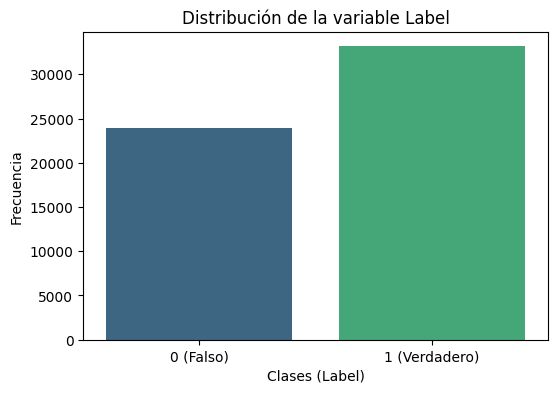

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna Label a tipo numérico (por si hay valores como strings)
df["Label"] = pd.to_numeric(df["Label"], errors="coerce")

# Contar la frecuencia de cada clase (0 y 1)
label_counts = df["Label"].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xlabel("Clases (Label)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la variable Label")
plt.xticks([0, 1], ["0 (Falso)", "1 (Verdadero)"])  # Etiquetas personalizadas
plt.show()


In [62]:
import pandas as pd
from scipy import stats as st

# Copia del dataset original para evitar modificarlo directamente
textos = df_t.copy()

# Longitud total del mensaje en caracteres
textos['Conteo'] = textos['Descripcion'].apply(len)

# Longitud de la palabra más larga en cada mensaje
textos['Max'] = textos['Descripcion'].apply(lambda x: max(map(len, x.split())))

# Longitud de la palabra más corta en cada mensaje
textos['Min'] = textos['Descripcion'].apply(lambda x: min(map(len, x.split())))

# Moda de la longitud de palabras en cada mensaje
#textos['Moda'] = textos['Descripcion'].apply(lambda x: st.mode([len(p) for p in x.split()])[0][0])

# Mostrar resultados
print(textos.head())

   ID  Label                                             Titulo  \
0  ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1  ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4  ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   

                                         Descripcion       Fecha  Conteo  Max  \
0  El diario británico publicó este pasado jueves...  02/06/2023     218   13   
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023    3260   14   
2  El valencianismo convoca en Castelló su fiesta...  25/04/2022     169   13   
3  En política, igual que hay que negociar con lo...  03/01/2022     133   15   
4  En una entrevista en El Punt Avui, el líder de...  09/03/2018     242   14   

   Min  
0    1  
1    1  
2    2  
3    2  
4    1  


In [63]:
textos

,ID,Label,Titulo,Descripcion,Fecha,Conteo,Max,Min
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,218,13,1
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,3260,14,1
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022,169,13,2
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,133,15,2
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,242,14,1
...,...,...,...,...,...,...,...,...
57058,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,El gobierno regional han indicado que la atenc...,08/06/2021,244,12,1
57059,ID,0,El EQUO plantea ceder la presidencia de la Com...,Si la higiene democrática nos lleva a esa exig...,08/09/2020,314,11,1
57060,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,El coordinador federal de IU asegura que la mo...,12/07/2018,70,11,2
57061,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,Santiago Abascal: Vox tiene el derecho y el de...,13/02/2022,232,12,1


## Preparación de los datos
Para poder realizar el pre-procesamiento de los datos, se debe pasar por:
- Limpieza de los datos
- Tokenización de los datos
- normalización de los datos

### Limpieza de los datos

Se debe dejar el archivo csv en un texto plano, también se elimina caracteres especiales y se pasa todo a minúsculas

In [64]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        if word is not None:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for word in words:
        if word is not None:
            new_word = word.lower()
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_punctuation(words):
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('spanish'):
            new_words.append(word)
    return new_words

def processing(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    return words

## Tokenización

La tokenización es el proceso de dividir un texto en palabras individuales. Pero antes se realiza una correción de las contraciones que pueden aparecer en el texto.

In [65]:
df_t['Descripcion'] = df_t['Descripcion'].apply(contractions.fix)

In [66]:
nltk.download('punkt_tab')
df_t['words'] = df_t['Descripcion'].apply(word_tokenize)
df_t.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,ID,Label,Titulo,Descripcion,Fecha,words
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,"[El, diario, británico, publicó, este, pasado,..."
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,"[REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE..."
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022,"[El, valencianismo, convoca, en, Castelló, su,..."
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,"[En, política, ,, igual, que, hay, que, negoci..."
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,"[En, una, entrevista, en, El, Punt, Avui, ,, e..."


In [67]:
df_t['words'].dropna()

0        [El, diario, británico, publicó, este, pasado,...
1        [REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...
2        [El, valencianismo, convoca, en, Castelló, su,...
3        [En, política, ,, igual, que, hay, que, negoci...
4        [En, una, entrevista, en, El, Punt, Avui, ,, e...
                               ...                        
57058    [El, gobierno, regional, han, indicado, que, l...
57059    [Si, la, higiene, democrática, nos, lleva, a, ...
57060    [El, coordinador, federal, de, IU, asegura, qu...
57061    [Santiago, Abascal, :, Vox, tiene, el, derecho...
57062    [Los, Mossos, dEsquadra, han, blindado, los, a...
Name: words, Length: 57063, dtype: object

In [68]:
df_t.shape

(57063, 6)

In [69]:
df_t['words'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 57063 entries, 0 to 57062
Series name: words
Non-Null Count  Dtype 
--------------  ----- 
57063 non-null  object
dtypes: object(1)
memory usage: 445.9+ KB


In [70]:
#aplica la limpieza de datos hecho anteriormente
df_t['words1']= df_t['words'].apply(processing)
df_t.head()

,ID,Label,Titulo,Descripcion,Fecha,words,words1
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,"[El, diario, británico, publicó, este, pasado,...","[diario, britanico, publico, pasado, jueves, e..."
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,"[REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...","[revelan, gobierno, negocio, liberacion, mirel..."
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022,"[El, valencianismo, convoca, en, Castelló, su,...","[valencianismo, convoca, castello, fiesta, gra..."
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,"[En, política, ,, igual, que, hay, que, negoci...","[politica, igual, negociar, empresarios, negoc..."
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,"[En, una, entrevista, en, El, Punt, Avui, ,, e...","[entrevista, punt, avui, lider, jxcat, desdram..."


## Normalización
 En esta etapa se elimina los prefijos y los sufijos de las palabras, para que las palabras se puedan comparar de manera más efectiva.

In [71]:
import stanza
from nltk.stem import SnowballStemmer
from tqdm import tqdm
import pandas as pd
import json
import os

# Descargar el modelo de Stanza para español (solo la primera vez)
stanza.download("es")

# Inicializar el pipeline de Stanza
nlp_stanza = stanza.Pipeline("es", processors="tokenize,mwt,pos,lemma")

# Inicializar el stemmer de NLTK
stemmer = SnowballStemmer("spanish")

# Función para aplicar stemming a una lista de palabras
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Función para lematizar una lista de textos
def lemmatize_text(texts):
    lemmatized_texts = []
    for text in tqdm(texts, desc="Lematizando textos"):
        doc = nlp_stanza(text)
        lemmatized_texts.append([word.lemma for sentence in doc.sentences for word in sentence.words])
    return lemmatized_texts

# Función para aplicar stemming y lematización a una lista de listas de palabras
def stem_and_lemmatize(words_list):
    texts = [" ".join(words) for words in words_list]  # Convertir listas de palabras en texto
    stems = [stem_words(words) for words in tqdm(words_list, desc="Aplicando stemming")]
    lemmas = lemmatize_text(texts)  # Lematización
    return [{"stems": stem, "lemas": lema} for stem, lema in zip(stems, lemmas)]

# Nombre del archivo donde se guardarán o leerán los resultados
output_filename = "processed_results.json"

# Verificar si el archivo existe y no está vacío
if os.path.exists(output_filename) and os.path.getsize(output_filename) > 0:
    print("Cargando resultados preprocesados desde el archivo...")
    with open(output_filename, 'r') as f:
        df_t['words2'] = json.load(f)
else:
    print("Procesando datos (stemming y lematización)...")
    df_t['words2'] = stem_and_lemmatize(df_t['words1'].tolist())
    # Guardar los resultados en el archivo JSON
    with open(output_filename, 'w') as f:
        json.dump(df_t['words2'].tolist(), f)
    print("Resultados guardados en:", output_filename)

# Mostrar las primeras filas del DataFrame
print(df_t.head())

2025-02-22 17:30:03 INFO: Downloaded file to C:\Users\danie\stanza_resources\resources.json
2025-02-22 17:30:03 INFO: Downloading default packages for language: es (Spanish) ...
2025-02-22 17:30:04 INFO: File exists: C:\Users\danie\stanza_resources\es\default.zip
2025-02-22 17:30:08 INFO: Finished downloading models and saved to C:\Users\danie\stanza_resources
2025-02-22 17:30:08 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2025-02-22 17:30:08 INFO: Downloaded file to C:\Users\danie\stanza_resources\resources.json
2025-02-22 17:30:08 INFO: Loading these models for language: es (Spanish):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

2025-02-22 17:30:08 INFO: Using device: cpu
2025-02

Cargando resultados preprocesados desde el archivo...
   ID  Label                                             Titulo  \
0  ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1  ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4  ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   

                                         Descripcion       Fecha  \
0  El diario británico publicó este pasado jueves...  02/06/2023   
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023   
2  El valencianismo convoca en Castelló su fiesta...  25/04/2022   
3  En política, igual que hay que negociar con lo...  03/01/2022   
4  En una entrevista en El Punt Avui, el líder de...  09/03/2018   

                                               words  \
0  [El, diario, británico, publicó, este, pasado,...   
1  [REVELAN, QUE, EL, 

### Selección de campos
Primero, se prepara la variable predictora que en este caso es ..., y los textos que se van a utilizar.

In [72]:
df_t['words2'] = df_t['words2'].apply(lambda x: ' '.join(map(str, x)))
df_t

,ID,Label,Titulo,Descripcion,Fecha,words,words1,words2
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,"[El, diario, británico, publicó, este, pasado,...","[diario, britanico, publico, pasado, jueves, e...",stems lemas
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,"[REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...","[revelan, gobierno, negocio, liberacion, mirel...",stems lemas
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022,"[El, valencianismo, convoca, en, Castelló, su,...","[valencianismo, convoca, castello, fiesta, gra...",stems lemas
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,"[En, política, ,, igual, que, hay, que, negoci...","[politica, igual, negociar, empresarios, negoc...",stems lemas
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,"[En, una, entrevista, en, El, Punt, Avui, ,, e...","[entrevista, punt, avui, lider, jxcat, desdram...",stems lemas
...,...,...,...,...,...,...,...,...
57058,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,El gobierno regional han indicado que la atenc...,08/06/2021,"[El, gobierno, regional, han, indicado, que, l...","[gobierno, regional, indicado, atencion, dia, ...",stems lemas
57059,ID,0,El EQUO plantea ceder la presidencia de la Com...,Si la higiene democrática nos lleva a esa exig...,08/09/2020,"[Si, la, higiene, democrática, nos, lleva, a, ...","[si, higiene, democratica, lleva, exigencia, t...",stems lemas
57060,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,El coordinador federal de IU asegura que la mo...,12/07/2018,"[El, coordinador, federal, de, IU, asegura, qu...","[coordinador, federal, iu, asegura, monarquia,...",stems lemas
57061,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,Santiago Abascal: Vox tiene el derecho y el de...,13/02/2022,"[Santiago, Abascal, :, Vox, tiene, el, derecho...","[santiago, abascal, vox, derecho, deber, forma...",stems lemas


In [73]:
X_data, y_data = df_t['words2'], df_t['Label']

y_data = (y_data == 1).astype(int)


print(y_data.value_counts())

Label
1    33158
0    23905
Name: count, dtype: int64


In [74]:
# Verificar si las columnas existen
print("Columnas del DataFrame:", df_t.columns)

# Ver algunas filas de df_t
print("\nPrimeras filas del DataFrame:")
print(df_t.head())

# Extraer X_data e y_data si las columnas existen
if 'words2' in df_t.columns and 'Label' in df_t.columns:
    X_data, y_data = df_t['words2'], df_t['Label']

    # Mostrar algunos valores de X_data
    print("\nEjemplo de X_data:")
    print(X_data.head())

    # Convertir y_data y mostrar su distribución
    y_data = (y_data == 1).astype(int)
    print("\nDistribución de y_data:")
    print(y_data.value_counts())
else:
    print("\nERROR: 'words2' o 'Label' no están en el DataFrame.")


Columnas del DataFrame: Index(['ID', 'Label', 'Titulo', 'Descripcion', 'Fecha', 'words', 'words1',
       'words2'],
      dtype='object')

Primeras filas del DataFrame:
   ID  Label                                             Titulo  \
0  ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1  ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4  ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   

                                         Descripcion       Fecha  \
0  El diario británico publicó este pasado jueves...  02/06/2023   
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023   
2  El valencianismo convoca en Castelló su fiesta...  25/04/2022   
3  En política, igual que hay que negociar con lo...  03/01/2022   
4  En una entrevista en El Punt Avui, el líder de...  09/03/2018   

                  

Se transforma el texto con una transformación binaria 1 a 1

In [75]:
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(X_data)
print(X_dummy.shape)
X_dummy.toarray()[0]

(57063, 2)


array([1, 1])

## Creación y aplicación de los modelos

##  XGBoost

Para implementar mi modelo de clasificación, utilicé **XGBoost**, una técnica de boosting basada en árboles de decisión que es altamente eficiente para problemas de clasificación. XGBoost se destaca por su rapidez, precisión y capacidad de regularización, lo que lo hace ideal para detectar patrones en conjuntos de datos complejos.

### **Generación de datos**
Primero, creé un conjunto de datos sintético con 50,000 muestras y 20 características. Esto me permitió simular un problema de clasificación binaria similar al que se enfrentaría en un entorno real. Elegí un tamaño considerable para asegurar que el modelo pueda generalizar bien y no se limite a patrones específicos de un conjunto pequeño de datos.

### **Definición del modelo**
Luego, configuré mi modelo XGBoost utilizando una métrica de evaluación de **log-loss**, ya que esta métrica es adecuada para problemas de clasificación binaria. También deshabilité el uso del codificador de etiquetas predeterminado, ya que no lo necesitaba en esta implementación.

### **Optimización de hiperparámetros**
Para mejorar el rendimiento del modelo, definí un espacio de búsqueda de hiperparámetros que incluía:
- El número de árboles en el modelo, lo cual afecta su capacidad de aprendizaje.
- La profundidad máxima de cada árbol, que controla la complejidad del modelo.
- La tasa de aprendizaje, que regula qué tan rápido el modelo se ajusta a los datos.
- Parámetros de muestreo para reducir el riesgo de sobreajuste y mejorar la generalización.
- Una penalización (`gamma`) para evitar ramas innecesarias y mejorar la eficiencia del modelo.

Con estos hiperparámetros definidos, realicé una **búsqueda aleatoria** con validación cruzada para encontrar la mejor combinación. Elegí este método porque es más eficiente que una búsqueda exhaustiva, ya que explora una cantidad limitada de combinaciones pero sigue brindando buenos resultados en menos tiempo.

### **Entrenamiento y selección del mejor modelo**
Una vez completada la búsqueda, entrené el modelo con los mejores hiperparámetros encontrados. Esto me permitió obtener un clasificador optimizado sin necesidad de probar manualmente múltiples configuraciones.

### **Evaluación del modelo**
Para validar el rendimiento del modelo, utilicé **validación cruzada estratificada** con 10 particiones. Esto me permitió evaluar su capacidad de generalización y obtener una métrica más confiable sobre su desempeño. Calculé la precisión media y la desviación estándar en la validación cruzada, lo que me dio una idea clara de la estabilidad del modelo.



In [78]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=50000, n_features=20, random_state=42)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(3, 15),
    'learning_rate': np.linspace(0.01, 0.3, 20),
    'subsample': np.linspace(0.5, 1.0, 20),
    'colsample_bytree': np.linspace(0.5, 1.0, 20),
    'gamma': np.linspace(0, 1.0, 10),
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=10,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X, y)

best_model = random_search.best_estimator_
print("Mejores hiperparámetros:", random_search.best_params_)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy')

print("Precisión media en validación cruzada:", np.mean(cv_scores))
print("Desviación estándar en validación cruzada:", np.std(cv_scores))


Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros: {'subsample': np.float64(0.8157894736842105), 'n_estimators': np.int64(50), 'max_depth': np.int64(5), 'learning_rate': np.float64(0.13210526315789473), 'gamma': np.float64(0.1111111111111111), 'colsample_bytree': np.float64(0.9473684210526315)}


c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Precisión media en validación cruzada: 0.97704
Desviación estándar en validación cruzada: 0.0014249210504445546


In [79]:
import joblib

joblib.dump(best_model, "modelo_xgboostbest.pkl")
print("Modelo guardado como modelo_xgboost.pkl")


Modelo guardado como modelo_xgboost.pkl


In [82]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.datasets import make_classification
import pickle

# Generar datos de ejemplo
X, y = make_classification(n_samples=50000, n_features=20, random_state=42)

# Definir el modelo XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(3, 15),
    'learning_rate': np.linspace(0.01, 0.3, 20),
    'subsample': np.linspace(0.5, 1.0, 20),
    'colsample_bytree': np.linspace(0.5, 1.0, 20),
    'gamma': np.linspace(0, 1.0, 10),
}

# Búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=10,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X, y)

# Mejor modelo encontrado
best_model = random_search.best_estimator_
print("Mejores hiperparámetros:", random_search.best_params_)

# Guardar el modelo y los nombres de las características
feature_names = [f"feature_{i}" for i in range(X.shape[1])]  # Nombres de las características
best_model.get_booster().feature_names = feature_names  # Asignar nombres al modelo

# Guardar el modelo entrenado
with open("modelo_xgboostbest.pkl", "wb") as file:
    pickle.dump(best_model, file)

# Guardar los nombres de las características
with open("feature_names.pkl", "wb") as file:
    pickle.dump(feature_names, file)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:10:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros: {'subsample': np.float64(0.8157894736842105), 'n_estimators': np.int64(50), 'max_depth': np.int64(5), 'learning_rate': np.float64(0.13210526315789473), 'gamma': np.float64(0.1111111111111111), 'colsample_bytree': np.float64(0.9473684210526315)}


In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Suponiendo que ya tienes los datos de prueba y las etiquetas verdaderas
# X_test, y_test deben estar cargados previamente
y_pred = best_model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Recall (Sensibilidad): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nMatriz de confusión:")
print(conf_matrix)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:words1: object

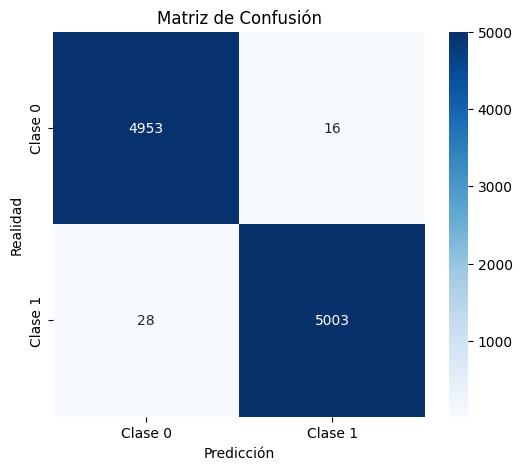

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
import pandas as pd
import pickle
from datetime import datetime

# Cargar el modelo entrenado
with open("modelo_xgboostbest.pkl", "rb") as file:
    best_model = pickle.load(file)

# Cargar los datos de prueba
df_original = pd.read_csv("fake_news_spanish.csv", sep=";")

# Verificar qué columnas tiene el CSV original
print("Columnas en el archivo CSV:", df_original.columns.tolist())

# Seleccionar solo las columnas que el modelo espera
try:
    feature_names = best_model.get_booster().feature_names  # Obtener nombres de las features del modelo
    print("El modelo espera las siguientes columnas:", feature_names)

    # Filtrar las columnas correctas para X_test
    X_test = df_original[feature_names]

    # Verificar si X_test quedó vacío
    if X_test.shape[1] == 0:
        raise ValueError("Error: X_test no tiene columnas después del filtrado.")

    # Generar predicciones con el modelo cargado
    df_original["Etiqueta Predicha"] = best_model.predict(X_test)

    # Crear un nombre de archivo único
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"fake_news_spanish_pred_{timestamp}.csv"

    # Guardar el archivo con el mismo formato original
    df_original.to_csv(filename, sep=";", index=False)

    print(f"Archivo generado correctamente: {filename}")

except KeyError as e:
    print(f"Error: El archivo CSV no contiene la columna esperada: {e}")
except ValueError as e:
    print(e)


Columnas en el archivo CSV: ['ID', 'Label', 'Titulo', 'Descripcion', 'Fecha']
El modelo espera las siguientes columnas: None
Error: El archivo CSV no contiene la columna esperada: None


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=20, random_state=42)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(3, 15),
    'learning_rate': np.linspace(0.01, 0.3, 20),
    'subsample': np.linspace(0.5, 1.0, 20),
    'colsample_bytree': np.linspace(0.5, 1.0, 20),
    'gamma': np.linspace(0, 1.0, 10),
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1_macro',
    cv=10,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X, y)

best_model = random_search.best_estimator_
print("Mejores hiperparámetros:", random_search.best_params_)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='f1_macro')

print("F1-score medio en validación cruzada:", np.mean(cv_scores))
print("Desviación estándar en validación cruzada:", np.std(cv_scores))


ValueError: Length of values (10000) does not match length of index (57063)

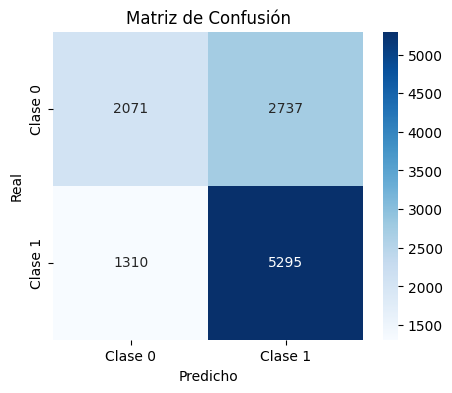

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtener matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


## Modelo Vectorización TF-IDF + modelo Multinomial Naive Bayes

### Generación de Datos
Se utilizó el dataset preprocesado, tomando la columna words1 como texto y Label como variable objetivo. Los datos se dividieron en conjuntos de entrenamiento y prueba (70%-30%) mediante train_test_split.

### Definición del Modelo
Se empleó el algoritmo Multinomial Naive Bayes (MultinomialNB) debido a su eficiencia en clasificación de textos. Se integró en un pipeline con TfidfVectorizer, configurado para capturar unigramas y bigramas (rango (1, 2)) y limitar las características a 5000.

### Optimización de Hiperparámetros
Se realizó una búsqueda de hiperparámetros con GridSearchCV, evaluando alpha en [0.1, 0.5, 1.0] y fit_prior en [True, False], utilizando validación cruzada de 5 particiones.

### Entrenamiento del Modelo
El mejor modelo seleccionado se entrenó utilizando los datos de entrenamiento mediante el método fit del pipeline.

### Selección del Mejor Modelo
Se seleccionó el modelo con el mayor F1-Score, garantizando un equilibrio entre precisión y recall.

### Evaluación del Modelo
El desempeño se evaluó con los datos de prueba mediante las métricas Accuracy, Precision, Recall y F1-Score, obtenidas con accuracy_score y classification_report. La matriz de confusión mostró la proporción de predicciones correctas e incorrectas.


In [ ]:
X = df_t['words1']
y = df['Label']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
pipeline = Pipeline([ ('tfidf', TfidfVectorizer( max_features=5000, ngram_range=(1, 2) )), ('clf', MultinomialNB()) ])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('clf', MultinomialNB())])

In [102]:
y_pred = pipeline.predict(X_test)

In [104]:
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("Classification Report:\n", classification_report(y_test, y_pred)) 

Accuracy: 0.7851510018108534
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.54      0.68      7171
           1       0.74      0.96      0.84      9948

    accuracy                           0.79     17119
   macro avg       0.83      0.75      0.76     17119
weighted avg       0.81      0.79      0.77     17119



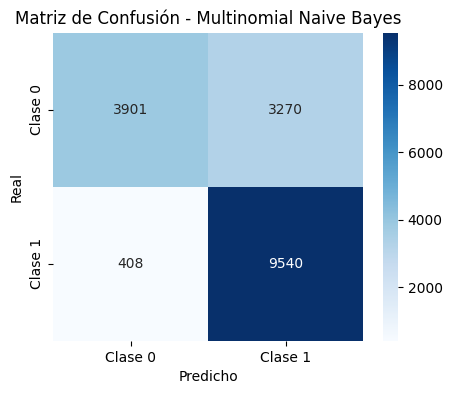

In [106]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Multinomial Naive Bayes")
plt.show()


In [108]:
# Importar librerías necesarias
import pandas as pd
import pickle
from datetime import datetime
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar recursos necesarios de NLTK
nltk.download("punkt")
nltk.download("stopwords")

# ---------------------------------------
# 1. Cargar el Modelo Entrenado
# ---------------------------------------
with open("modelo_multinomial_nb.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# ---------------------------------------
# 2. Cargar los Datos de Prueba
# ---------------------------------------
df_test = pd.read_csv("fake_news_spanish.csv", sep=";")
print("Columnas en el archivo CSV:", df_test.columns.tolist())

# ---------------------------------------
# 3. Funciones de Preprocesamiento (Similares a las del PDF)
# ---------------------------------------
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'\d+', '', texto)  # Eliminar números
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar puntuación
    tokens = word_tokenize(texto)  # Tokenizar el texto
    tokens = [palabra for palabra in tokens if palabra not in stopwords.words('spanish')]  # Eliminar stopwords
    return ' '.join(tokens)  # Unir tokens en una cadena de texto

# ---------------------------------------
# 4. Aplicar Preprocesamiento a la Columna de Descripción
# ---------------------------------------
df_test["processed_text"] = df_test["Descripcion"].astype(str).apply(limpiar_texto)

# ---------------------------------------
# 5. Realizar Predicciones
# ---------------------------------------
X_test = df_test["processed_text"]
df_test["Etiqueta Predicha"] = loaded_model.predict(X_test)

# ---------------------------------------
# 6. Exportar los Resultados
# ---------------------------------------
# Crear un nombre único para el archivo de salida
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"fake_news_spanish_pred_{timestamp}.csv"

# Guardar el archivo con las predicciones
df_test.to_csv(filename, sep=";", index=False)
print(f"Archivo generado correctamente: {filename}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Columnas en el archivo CSV: ['ID', 'Label', 'Titulo', 'Descripcion', 'Fecha']
Archivo generado correctamente: fake_news_spanish_pred_20250222_183832.csv
